In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [49]:
hr = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\human-resources-analytics\HR.csv")

In [50]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [51]:
hr = pd.get_dummies(hr, drop_first = True)

In [52]:
x = hr.drop("left", axis=1)
y = hr["left"]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2022, test_size = 0.3)

In [54]:
dtc = DecisionTreeClassifier( random_state = 2022, max_depth = 4)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_prob = dtc.predict_proba(x_test)[:,1]

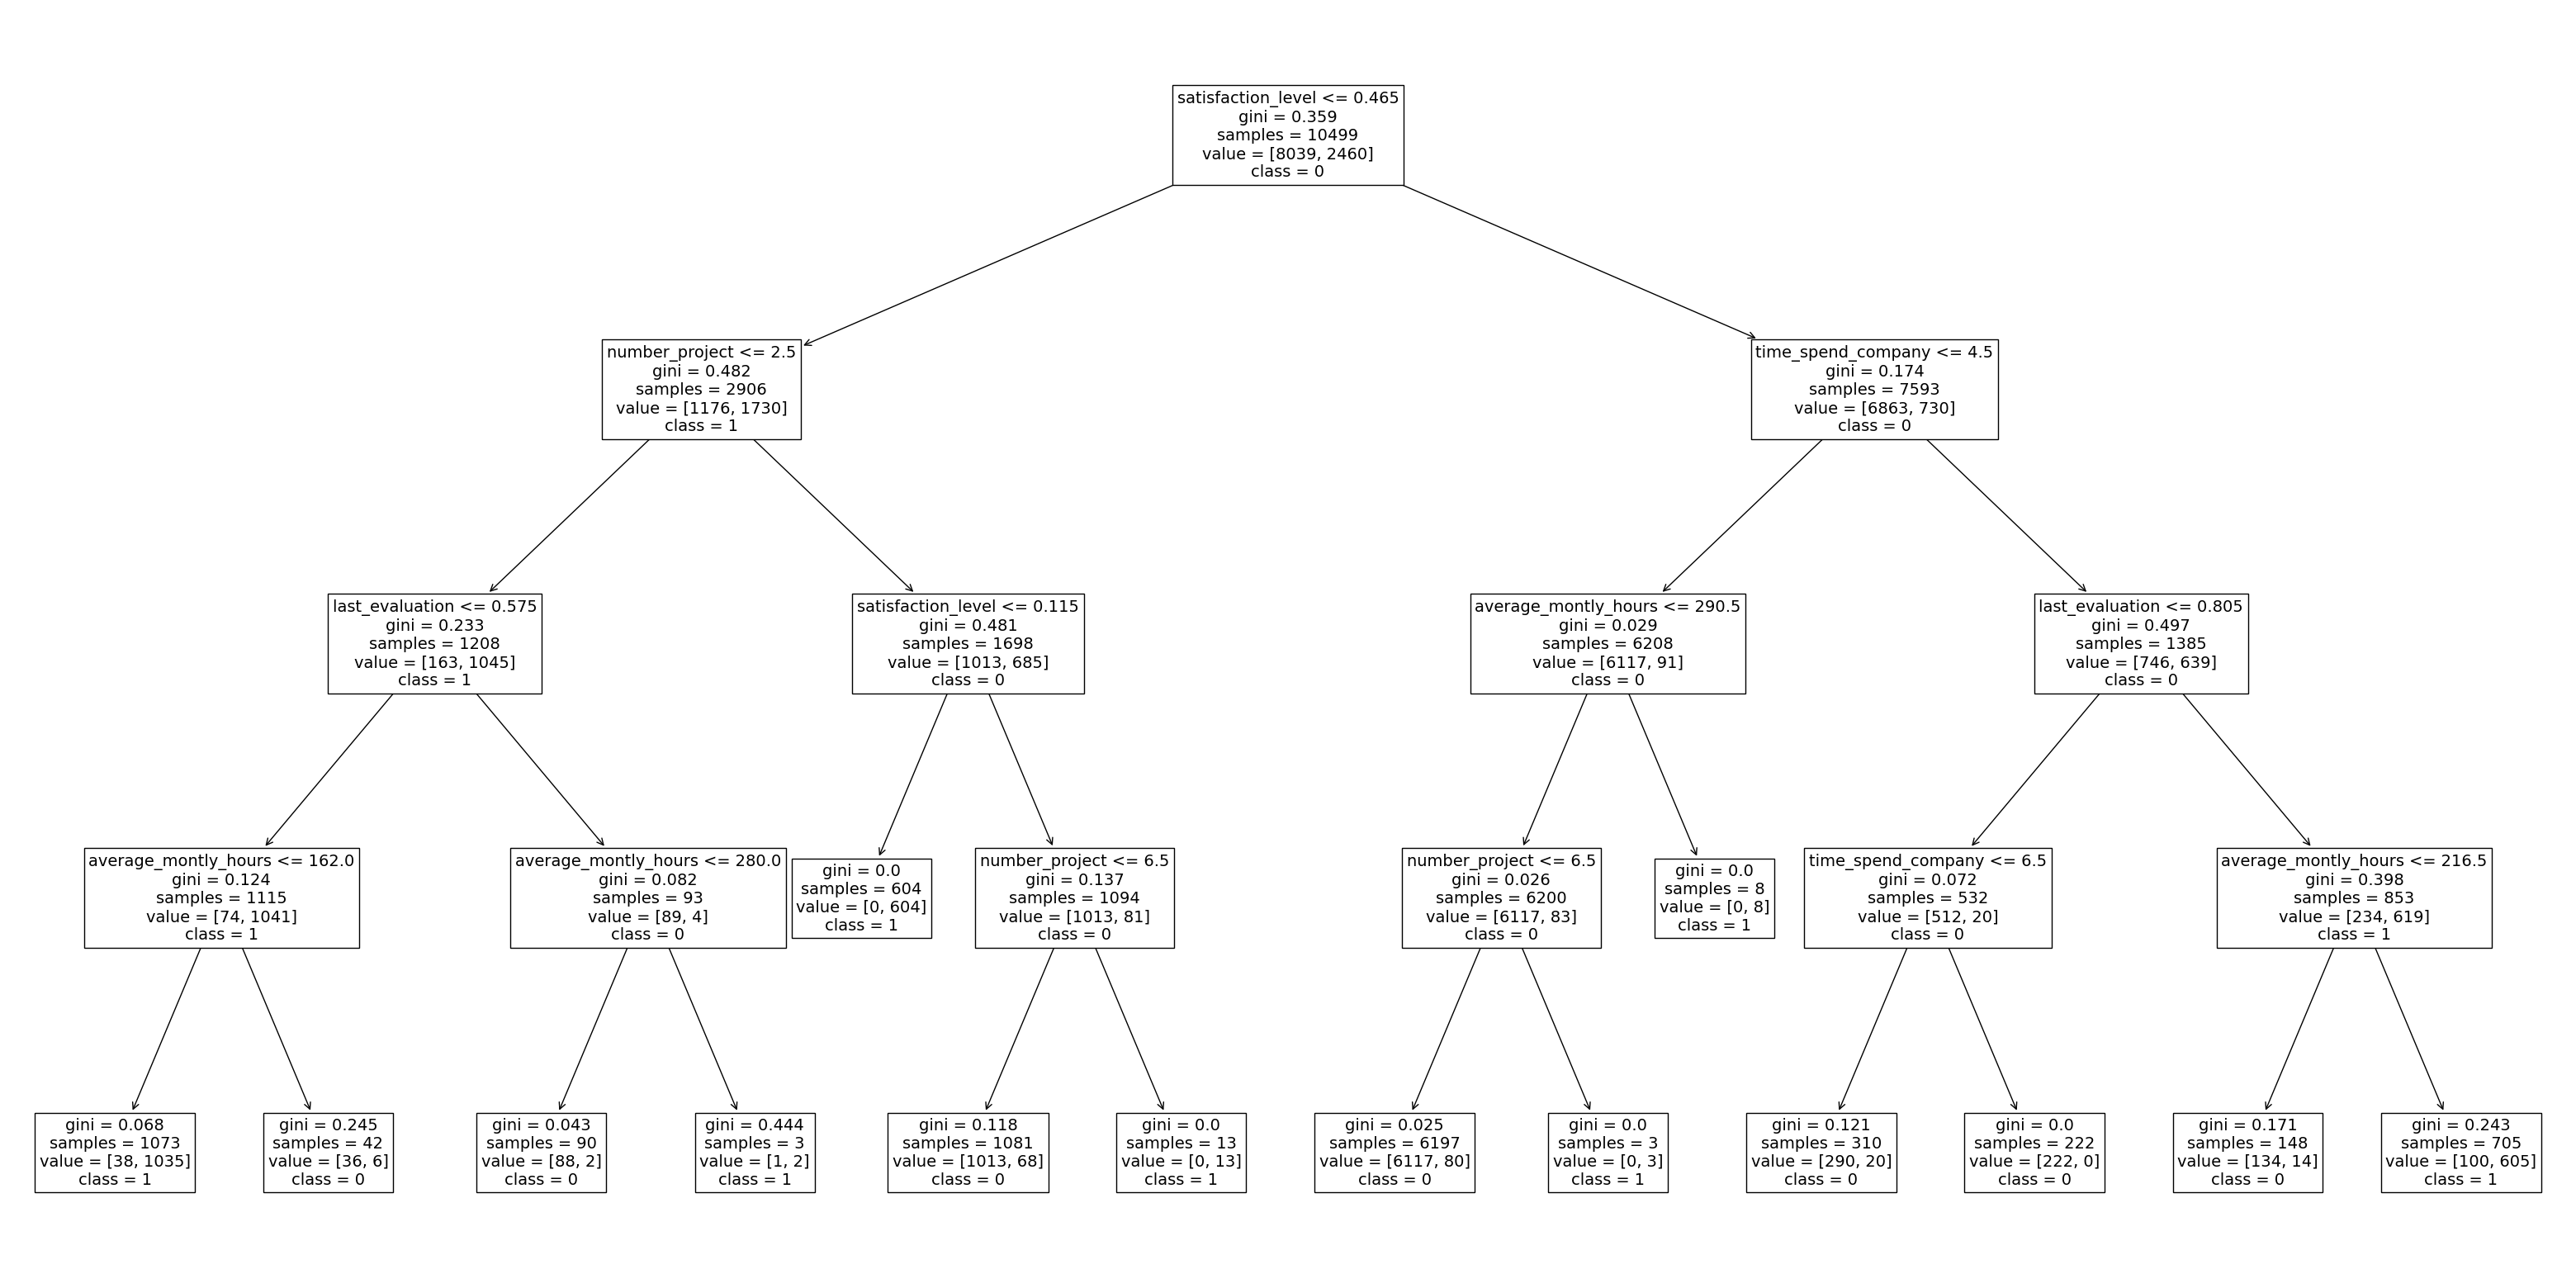

In [55]:
plt.figure(figsize=(40,20))
plot_tree(dtc, feature_names = x.columns, class_names=["0","1"], fontsize=14)
plt.show()

In [56]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.9695555555555555
0.9731456326511967


In [57]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
dtc = DecisionTreeClassifier(random_state = 2022)
params = {"max_depth" : [2,3,4,5],
          "min_samples_split" : [2,5,10],
          "min_samples_split" : [1,5,10]}
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, scoring = "roc_auc", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ..max_depth=2, min_samples_split=5;, score=0.910 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_split=5;, score=0.907 total time=   0.0s
[CV 3/5] END ..max_depth=2, min_samples_split=5;, score=0.910 total time=   0.0s
[CV 4/5] END ..max_depth=2, min_samples_split=5;, score=0.907 total time=   0.0s
[CV 5/5] END ..max_depth=2, min_samples_split=5;, score=0.906 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_split=10;, score=0.910 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_split=10;

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [1, 5, 10]},
             scoring='roc_auc', verbose=3)

In [58]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5, 'min_samples_split': 5}
0.9754977807488899


[5.33230136e-01 1.45748608e-01 1.02141458e-01 6.35536499e-02
 1.55203780e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.22367222e-04
 0.00000000e+00 0.00000000e+00]


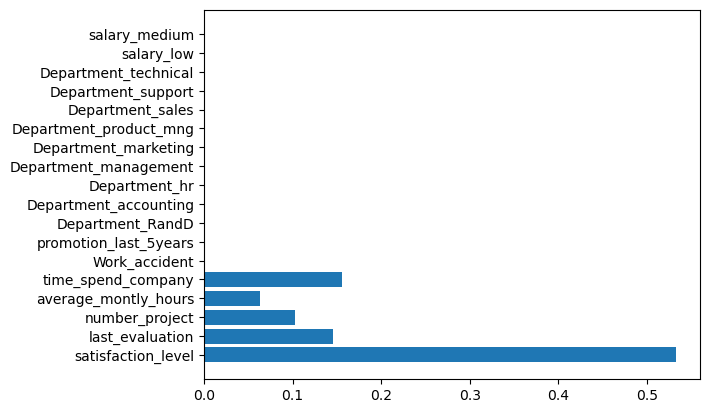

In [59]:
best_model = gcv.best_estimator_
print(best_model.feature_importances_)
imps = best_model.feature_importances_
plt.barh(x.columns, imps)
plt.show()